In [ ]:
#step 1: Load dataset
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#Load the California Housing Dataset
housing=fetch_california_housing()

#convert to DataFrame
dataset=pd.DataFrame(housing.data,columns=housing.feature_names)

#Add the target variable(house prices)
dataset['Price'] = housing.target

#Display dataset info
print(dataset.info())

#display first 5 rows
print(dataset.head())

#check for missing values
print(dataset.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      5

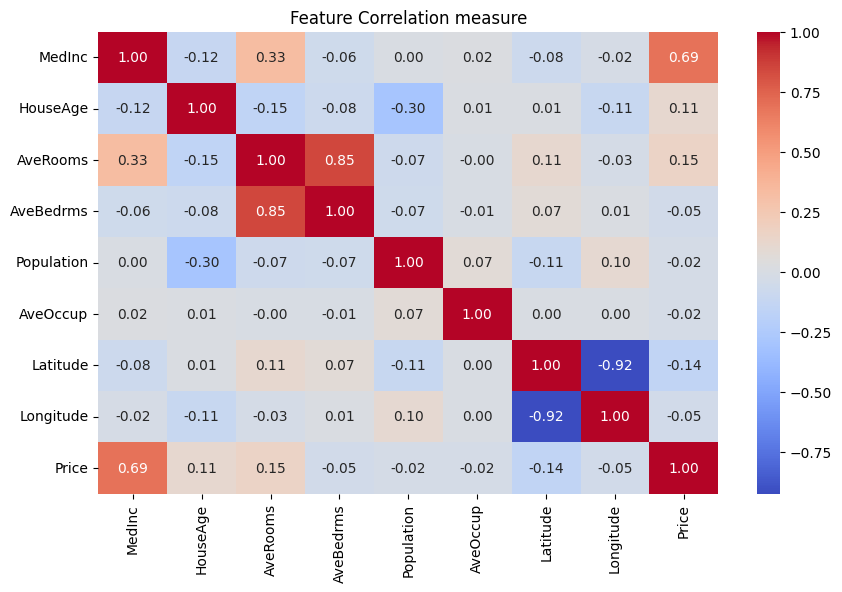

In [7]:
#step 2 :Explore the dataset
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(), annot=True ,cmap="coolwarm",fmt='.2f')
plt.title("Feature Correlation measure")
plt.show()

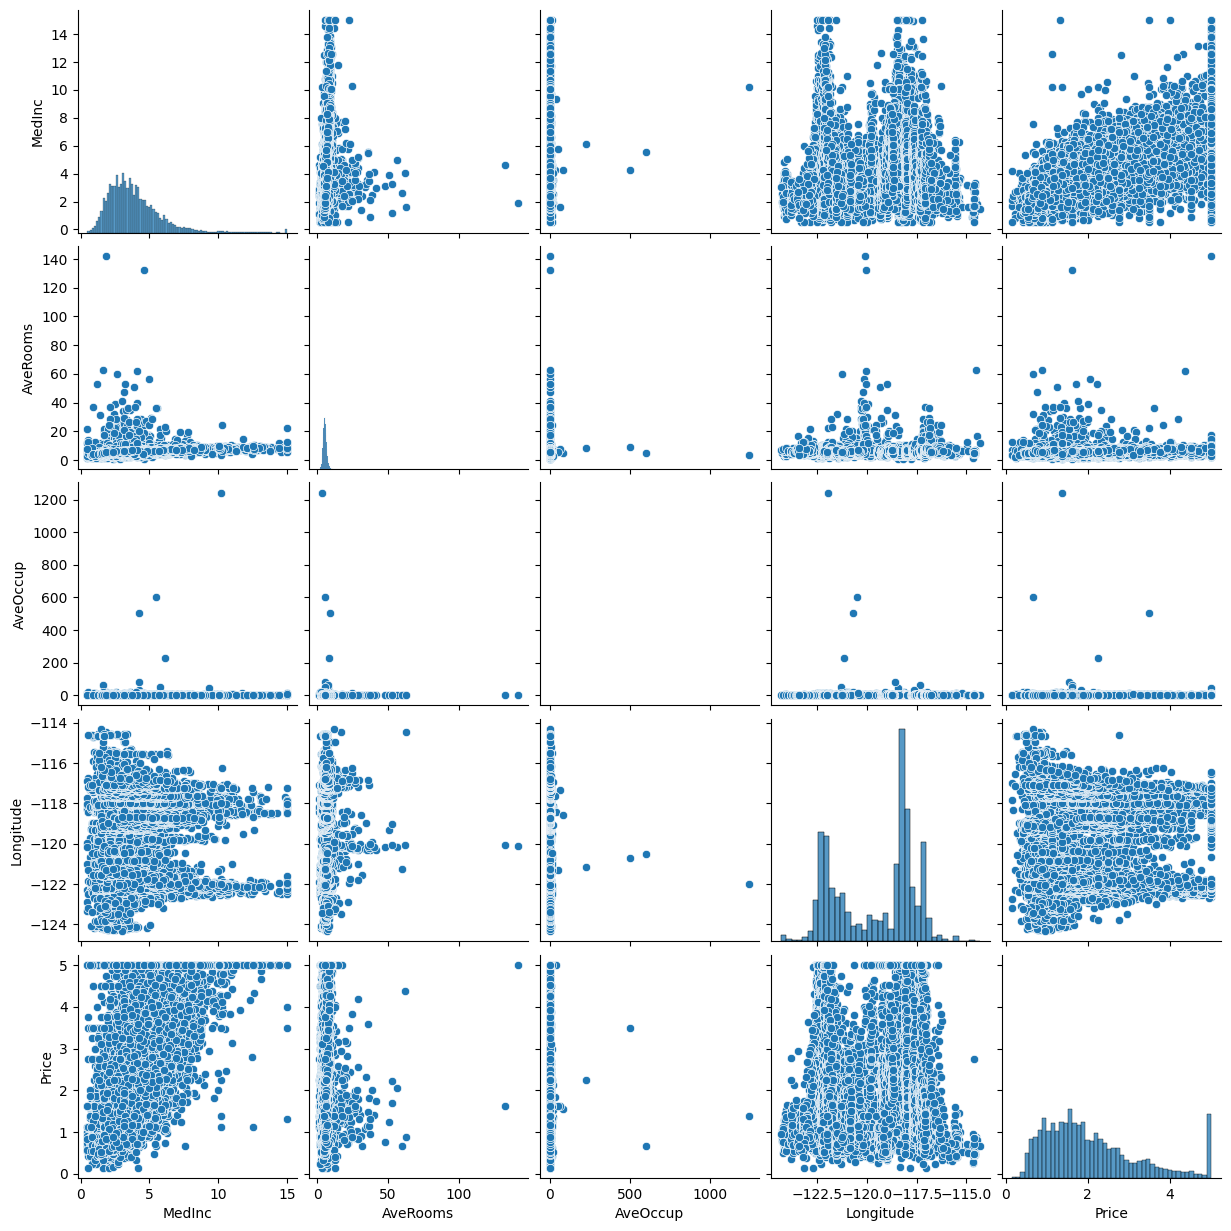

In [9]:
#pairplot to analyse relationships
sns.pairplot(dataset,vars=['MedInc','AveRooms','AveOccup','Longitude','Price'])
plt.show()

In [11]:
#step 3 :Feature selection and train-test split
#selecting independant(x) and dependant (y) variable
X=dataset.iloc[:,:-1]#all features except price
y=dataset.iloc[:,-1]#price

#splitting into training(80%) and testing(20%) sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print("Training set shape: ",X_train.shape)
print("Testing set shape:",X_test.shape)

Training set shape:  (16512, 8)
Testing set shape: (4128, 8)


In [12]:
#step 4: Standarization (Scaling)
#standardising the dataset
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [13]:
#step 5: Train the Linear Regression model
regression=LinearRegression()
regression.fit(X_train_scaled,y_train)

#Display coefficients and intercept
print("Model Coefficients:",regression.coef_)
print("Model Intercept:",regression.intercept_)

Model Coefficients: [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]
Model Intercept: 2.0719469373788777


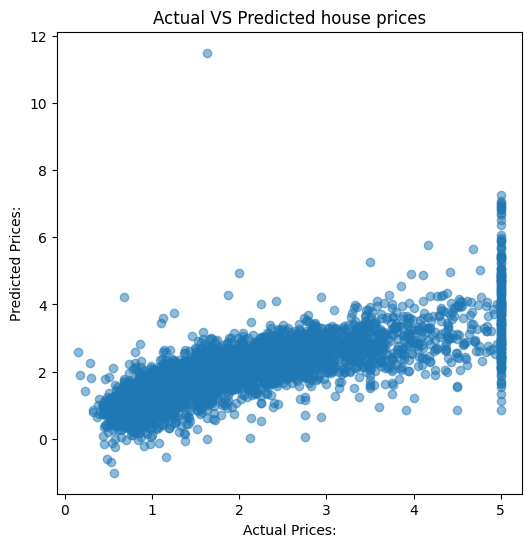

Mean Absolute Error(MAE):(mae:.4f)
Mean Squared Error(MSE):(mse:.4f)
Root Mean Squared Error(RMSE):(rmse:.4f)
R^2 Score :(r2:.4f)


In [14]:
#step 6 :model prediction and evaluation
#predict on test data
y_pred=regression.predict(X_test_scaled)

#plot predictions vs actual values
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("Actual Prices:")
plt.ylabel("Predicted Prices:")
plt.title("Actual VS Predicted house prices")
plt.show()

#calculate performance metrices
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

#Display results
print(f"Mean Absolute Error(MAE):(mae:.4f)")
print(f"Mean Squared Error(MSE):(mse:.4f)")
print(f"Root Mean Squared Error(RMSE):(rmse:.4f)")
print(f"R^2 Score :(r2:.4f)")


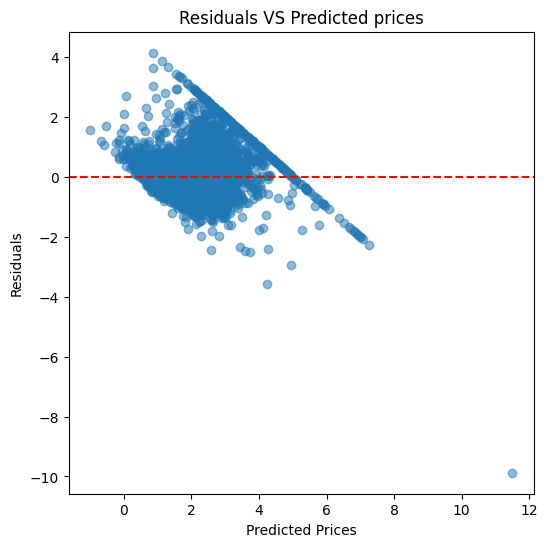

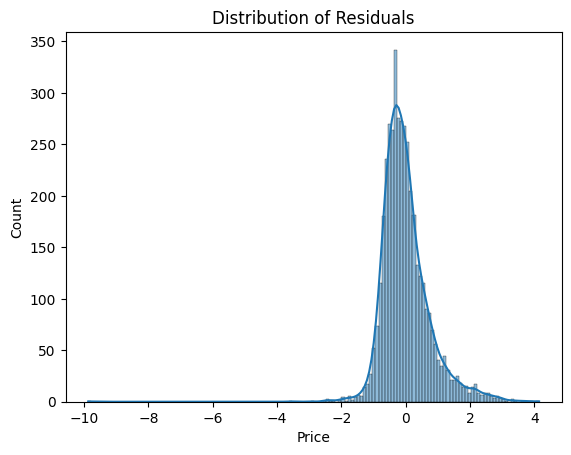

In [16]:
#calculate residuals
residuals=y_test-y_pred

#residuals plot
plt.figure(figsize=(6,6))
plt.scatter(y_pred,residuals,alpha=0.5)
plt.axhline(y=0,color='r',linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residuals VS Predicted prices")
plt.show()

#distribution of residuals
sns.histplot(residuals,kde=True)
plt.title("Distribution of Residuals")
plt.show()
